In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Google Colab
from google.colab import files
uploaded = files.upload()
file_path = "player_data.csv"
data = pd.read_csv(file_path)

# Preview the dataset
print("Data Preview:")
print(data.head())

# Preprocess columns
# Convert 'From' and 'To' columns to numeric
data['From'] = pd.to_numeric(data['From'], errors='coerce')
data['To'] = pd.to_numeric(data['To'], errors='coerce')

# Convert height ('Ht') from feet-inches to total inches
data['Ht'] = data['Ht'].apply(
    lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]) if '-' in x else None
)

# Convert weight ('Wt') to numeric
data['Wt'] = pd.to_numeric(data['Wt'], errors='coerce')

# Drop rows with missing or invalid data
data.dropna(subset=['From', 'To', 'Ht', 'Wt'], inplace=True)

# Preview the cleaned dataset
print("\nCleaned Data:")
print(data.head())


Saving player_data.csv to player_data.csv
Data Preview:
                 Player  From    To  Pos    Ht     Wt       Birth Date  \
0        Alaa Abdelnaby  1991  1995  F-C  6-10  240.0     June 24 1968   
1       Zaid Abdul-Aziz  1969  1978  C-F   6-9  235.0     April 7 1946   
2  Kareem Abdul-Jabbar*  1970  1989    C   7-2  225.0    April 16 1947   
3    Mahmoud Abdul-Rauf  1991  2001    G   6-1  162.0     March 9 1969   
4     Tariq Abdul-Wahad  1998  2003    F   6-6  223.0  November 3 1974   

                  Colleges  
0                     Duke  
1               Iowa State  
2                     UCLA  
3                      LSU  
4  Michigan San Jose State  

Cleaned Data:
                 Player  From    To  Pos  Ht     Wt       Birth Date  \
0        Alaa Abdelnaby  1991  1995  F-C  82  240.0     June 24 1968   
1       Zaid Abdul-Aziz  1969  1978  C-F  81  235.0     April 7 1946   
2  Kareem Abdul-Jabbar*  1970  1989    C  86  225.0    April 16 1947   
3    Mahmoud Abdul-Rau

In [2]:
#Calculate the average height ('Ht') and weight ('Wt') for each basketball position ('Pos')
average_stats_by_pos = data.groupby('Pos')[['Ht', 'Wt']].mean().sort_values(by='Ht', ascending=False)
print("\nAverage Height and Weight by Position:")
print(average_stats_by_pos)



Average Height and Weight by Position:
            Ht          Wt
Pos                       
C    83.193548  245.043643
C-F  81.480176  229.660793
F-C  80.561275  224.745098
F    79.363382  218.513627
F-G  77.536697  203.064220
G-F  76.781170  199.437659
G    74.641243  188.172316


In [3]:
# Tallest players
tallest_players = data.nlargest(10, 'Ht')
print("\nTop 10 Tallest Players:")
print(tallest_players[['Player', 'Ht']])

# Heaviest players
heaviest_players = data.nlargest(10, 'Wt')
print("\nTop 10 Heaviest Players:")
print(heaviest_players[['Player', 'Wt']])



Top 10 Tallest Players:
                Player  Ht
404         Manute Bol  91
3130  Gheorghe Mure?an  91
476      Shawn Bradley  90
3019         Yao Ming*  90
341        Sim Bhullar  89
3210      Chuck Nevitt  89
3513   Pavel Podkolzin  89
4545     Slavko Vraneš  89
1216        Mark Eaton  88
1325        Mark Eaton  88

Top 10 Heaviest Players:
                 Player     Wt
341         Sim Bhullar  360.0
1724    Thomas Hamilton  330.0
2531  Priest Lauderdale  325.0
3286  Shaquille O'Neal*  325.0
2305       Garth Joseph  315.0
3019          Yao Ming*  310.0
3506     Dexter Pittman  308.0
3444     Nikola Pekovi?  307.0
3966       Ha Seung-Jin  305.0
4020       Garret Siler  305.0


In [4]:
# Create a 'Decade' column
data['Decade'] = (data['From'] // 10) * 10

# Analyze average height and weight by decade
decade_trends = data.groupby('Decade')[['Ht', 'Wt']].mean()
print("\nAverage Height and Weight by Decade:")
print(decade_trends)



Average Height and Weight by Decade:
               Ht          Wt
Decade                       
1940    74.674825  189.856643
1950    75.970745  195.159574
1960    77.241015  202.879493
1970    77.708767  201.150074
1980    78.816038  207.559748
1990    78.678211  215.304473
2000    79.172821  222.536189
2010    78.582830  217.998791
2020    78.006006  210.813814


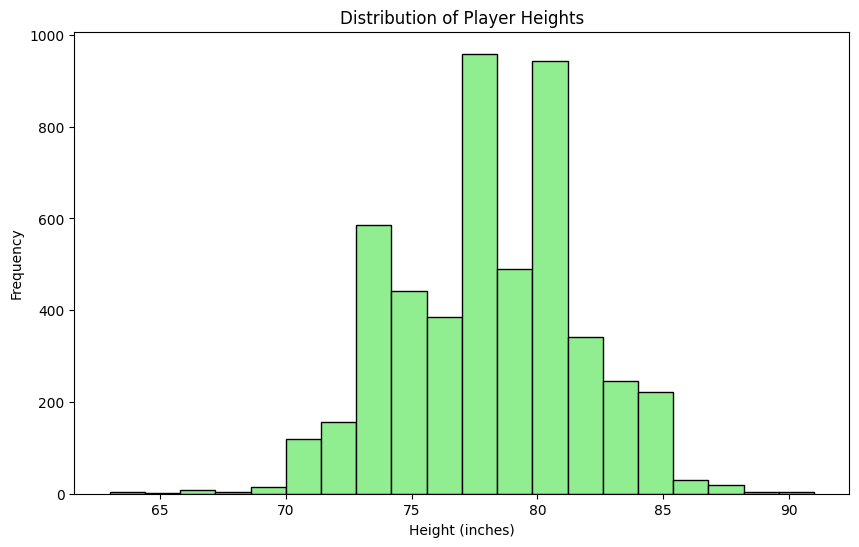

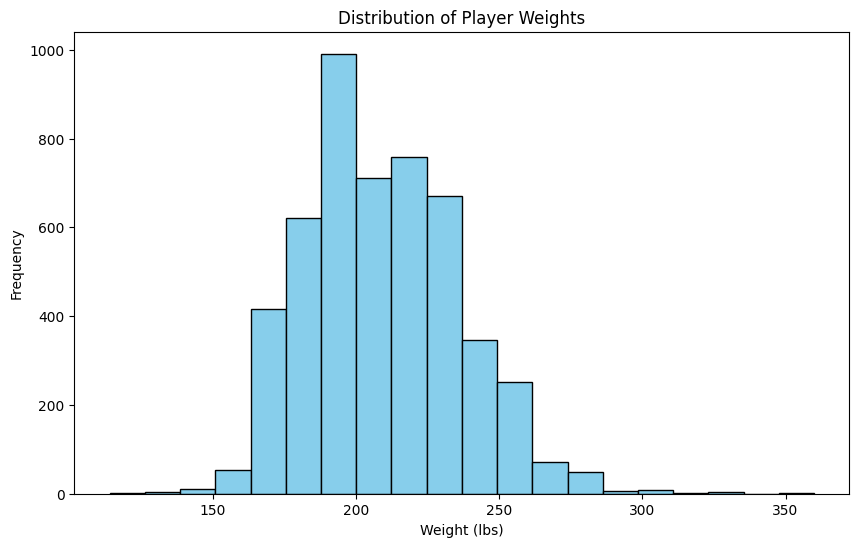

In [5]:
# Height distribution
plt.figure(figsize=(10, 6))
data['Ht'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Player Heights")
plt.xlabel("Height (inches)")
plt.ylabel("Frequency")
plt.show()

# Weight distribution
plt.figure(figsize=(10, 6))
data['Wt'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Player Weights")
plt.xlabel("Weight (lbs)")
plt.ylabel("Frequency")
plt.show()


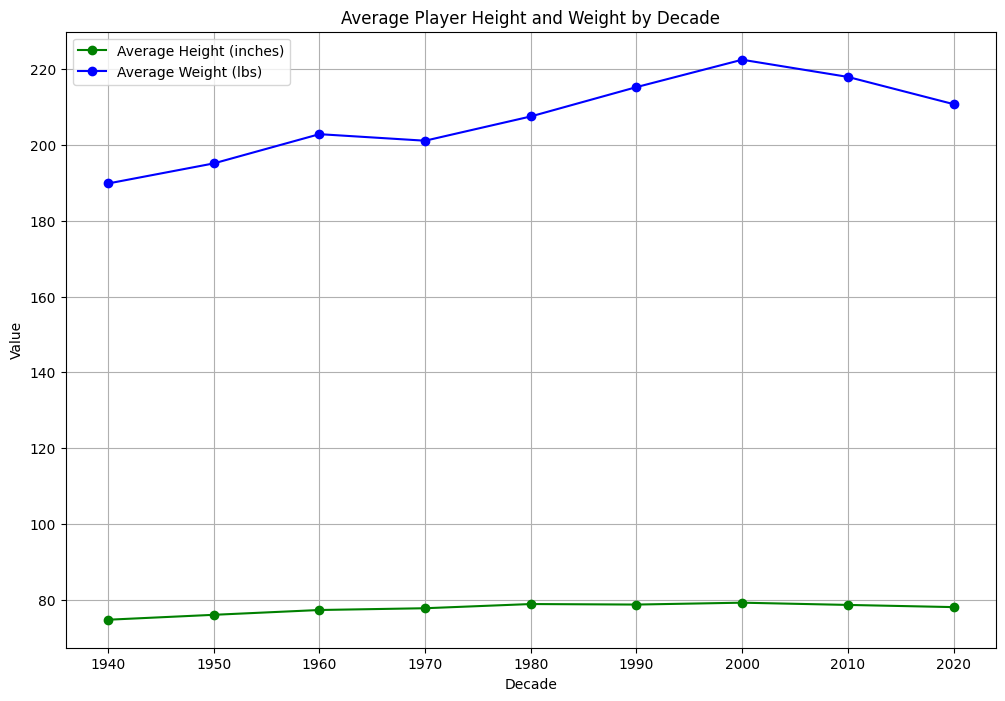

In [6]:
# Line plot for decade trends
plt.figure(figsize=(12, 8))
plt.plot(decade_trends.index, decade_trends['Ht'], marker='o', label='Average Height (inches)', color='green')
plt.plot(decade_trends.index, decade_trends['Wt'], marker='o', label='Average Weight (lbs)', color='blue')
plt.title("Average Player Height and Weight by Decade")
plt.xlabel("Decade")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


In [7]:
# Calculate career length
data['Career Length'] = data['To'] - data['From']

# Find the top 10 players with the longest careers
longest_careers = data.nlargest(10, 'Career Length')
print("\nTop 10 Players with Longest Careers:")
print(longest_careers[['Player', 'Career Length']])



Top 10 Players with Longest Careers:
                    Player  Career Length
4846          Kevin Willis             22
721           Vince Carter             21
1466        Kevin Garnett*             20
2194           Joe Johnson             20
2727         Moses Malone*             20
3258         Dirk Nowitzki             20
3387        Robert Parish*             20
2     Kareem Abdul-Jabbar*             19
591           Kobe Bryant*             19
903             Bob Cousy*             19



Top 10 Colleges Producing the Most NBA Players:
Colleges
Kentucky      108
UCLA           91
UNC            89
Duke           84
Kansas         73
Indiana        62
Louisville     59
Notre Dame     54
Michigan       54
Arizona        52
Name: count, dtype: int64


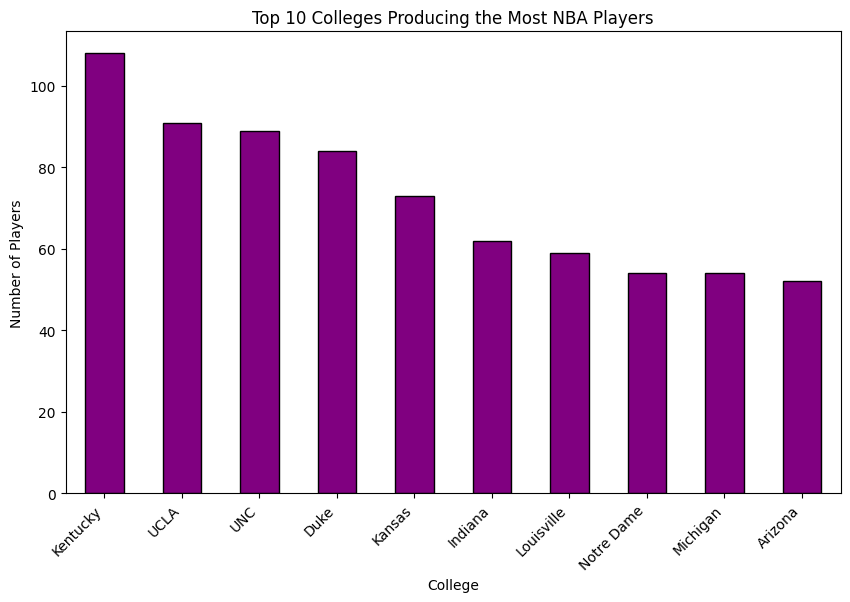

In [8]:
# Count the number of players from each college
college_counts = data['Colleges'].value_counts().head(10)
print("\nTop 10 Colleges Producing the Most NBA Players:")
print(college_counts)

# Visualize
plt.figure(figsize=(10, 6))
college_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 10 Colleges Producing the Most NBA Players")
plt.xlabel("College")
plt.ylabel("Number of Players")
plt.xticks(rotation=45, ha="right")
plt.show()


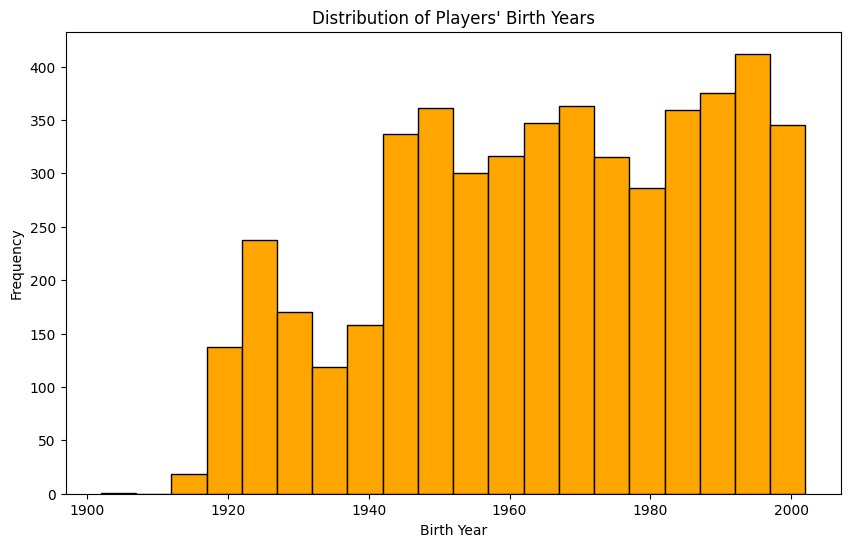

In [9]:
# Extract birth year from 'Birth Date' column
data['Birth Year'] = pd.to_datetime(data['Birth Date'], errors='coerce').dt.year

# Plot the distribution of birth years
plt.figure(figsize=(10, 6))
data['Birth Year'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Players' Birth Years")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.show()



Position Counts:
Pos
G      1770
F      1431
C       527
F-C     408
G-F     393
C-F     227
F-G     218
Name: count, dtype: int64


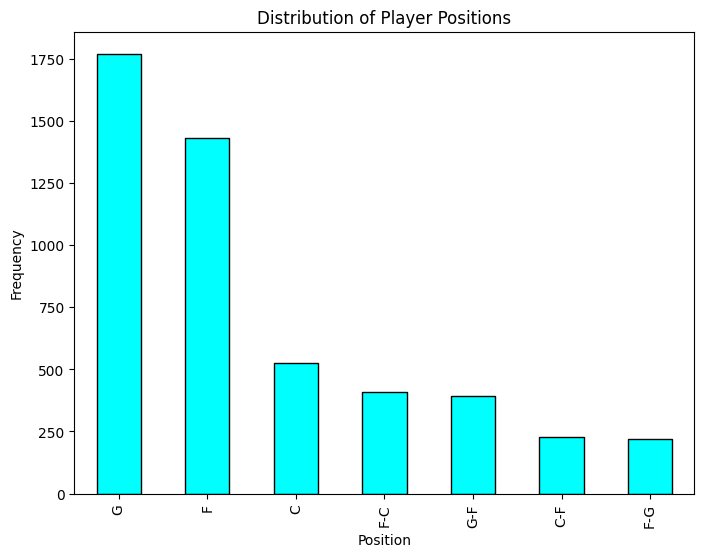

In [10]:
# Count the frequency of each position
position_counts = data['Pos'].value_counts()
print("\nPosition Counts:")
print(position_counts)

# Visualize
plt.figure(figsize=(8, 6))
position_counts.plot(kind='bar', color='cyan', edgecolor='black')
plt.title("Distribution of Player Positions")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Count players with multiple positions
data['Position Count'] = data['Pos'].apply(lambda x: len(x.split('-')) if isinstance(x, str) else 0)
multi_position_players = data[data['Position Count'] > 1]
print("\nPlayers Who Played Multiple Positions:")
print(multi_position_players[['Player', 'Pos']])



Players Who Played Multiple Positions:
               Player  Pos
0      Alaa Abdelnaby  F-C
1     Zaid Abdul-Aziz  C-F
9        Álex Abrines  G-F
13         Mark Acres  F-C
15         Quincy Acy  F-C
...               ...  ...
4964     Harry Zeller  C-F
4966     Tyler Zeller  F-C
4973      Paul Zipser  G-F
4974       Ante Žiži?  F-C
4978       Matt Zunic  G-F

[1246 rows x 2 columns]


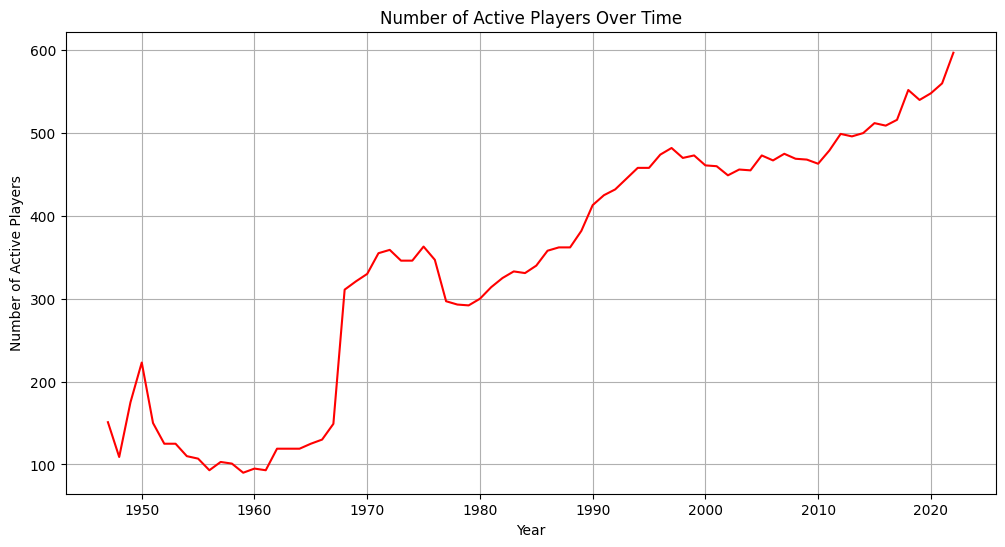

In [12]:
# Create a new DataFrame with all active years for each player
active_years = []
for _, row in data.iterrows():
    active_years.extend(range(int(row['From']), int(row['To']) + 1))

# Create a DataFrame for active years
active_years_df = pd.DataFrame({'Year': active_years})
active_player_counts = active_years_df['Year'].value_counts().sort_index()

# Visualize the trend of active players over time
plt.figure(figsize=(12, 6))
plt.plot(active_player_counts.index, active_player_counts.values, color='red')
plt.title("Number of Active Players Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Active Players")
plt.grid()
plt.show()


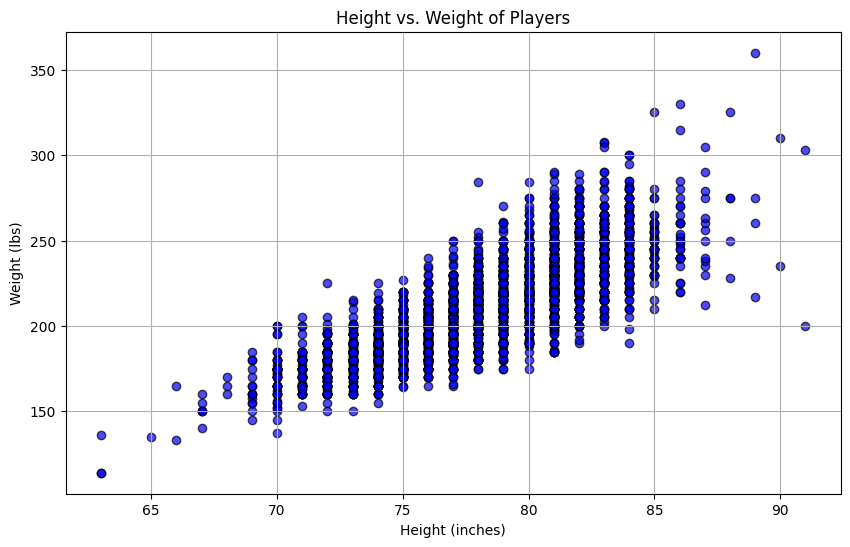

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Ht'], data['Wt'], alpha=0.7, color='blue', edgecolor='black')
plt.title("Height vs. Weight of Players")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.grid()
plt.show()


In [14]:
data['Career Length'] = data['To'] - data['From']


In [15]:
print(data.columns)


Index(['Player', 'From', 'To', 'Pos', 'Ht', 'Wt', 'Birth Date', 'Colleges',
       'Decade', 'Career Length', 'Birth Year', 'Position Count'],
      dtype='object')



Average Career Length by Position:
Pos
C-F    6.634361
F-C    6.338235
F-G    6.334862
G-F    5.318066
C      4.153700
G      3.737288
F      3.194270
Name: Career Length, dtype: float64


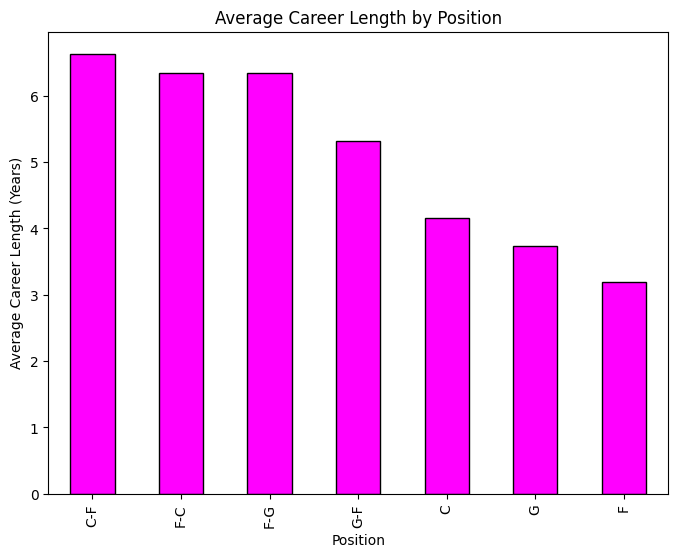

In [16]:
# Calculate average career length by position
average_career_length_by_pos = data.groupby('Pos')['Career Length'].mean().sort_values(ascending=False)
print("\nAverage Career Length by Position:")
print(average_career_length_by_pos)

# Visualize
plt.figure(figsize=(8, 6))
average_career_length_by_pos.plot(kind='bar', color='magenta', edgecolor='black')
plt.title("Average Career Length by Position")
plt.xlabel("Position")
plt.ylabel("Average Career Length (Years)")
plt.show()


In [17]:
data['Decade'] = (data['From'] // 10) * 10


In [18]:
# Group by decade and find players with the longest careers
top_players_by_decade = data.loc[data.groupby('Decade')['Career Length'].idxmax()]
print("\nTop Players by Decade:")
print(top_players_by_decade[['Player', 'Decade', 'Career Length']])



Top Players by Decade:
                        Player  Decade  Career Length
491                Carl Braun*    1940             14
903                 Bob Cousy*    1950             19
1813            John Havlicek*    1960             15
2727             Moses Malone*    1970             20
4846              Kevin Willis    1980             22
721               Vince Carter    1990             21
2194               Joe Johnson    2000             20
839            Darren Collison    2010             12
55    Nickeil Alexander-Walker    2020              2


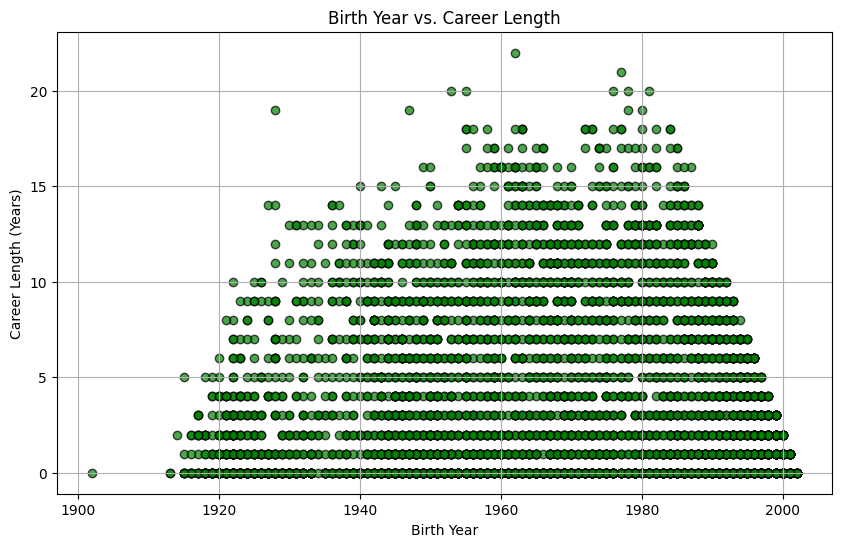

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Birth Year'], data['Career Length'], alpha=0.7, color='green', edgecolor='black')
plt.title("Birth Year vs. Career Length")
plt.xlabel("Birth Year")
plt.ylabel("Career Length (Years)")
plt.grid()
plt.show()


In [20]:
top_players_by_decade = data.loc[data.groupby('Decade')['Career Length'].idxmax()]


In [21]:
#Last player
# Selects the last row from the 'top_players_by_decade' DataFrame and stores it in 'last_player'.
last_player = top_players_by_decade.iloc[-1]
print("\nLast Player by Decade:")
for column, value in last_player.items():
    print(f"{column}: {value}")



Last Player by Decade:
Player: Nickeil Alexander-Walker
From: 2020
To: 2022
Pos: G
Ht: 78
Wt: 205.0
Birth Date: September 2 1998
Colleges: Virginia Tech
Decade: 2020
Career Length: 2
Birth Year: 1998.0
Position Count: 1


In [22]:
!pip install firebase-admin


In [23]:
import firebase_admin
from firebase_admin import credentials, firestore
from google.colab import files

# Upload the service account JSON file
uploaded = files.upload()

# Initialize Firebase Admin SDK only if not already initialized
if not firebase_admin._apps:
    cred = credentials.Certificate(next(iter(uploaded)))
    firebase_admin.initialize_app(cred)

# Get Firestore client
db = firestore.client()

# Now, you can start performing Firestore operations


Saving interactive-lab-2-419519-92e2f6da9fa2.json to interactive-lab-2-419519-92e2f6da9fa2.json


In [24]:
!pip install google-cloud-bigquery


In [25]:
# Query all players from Firestore
players = db.collection('players').stream()

# Print the player details
for player in players:
    print(player.id, player.to_dict())  # Print the document ID and its data


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
sS1qEBZuRr2iCRmtL36V {'Ht': 81, 'Player': 'Malcolm Thomas', 'Pos': 'F', 'Position Count': 1, 'Colleges': 'Pepperdine San Diego State', 'Wt': 225.0, 'Birth Year': 1988.0, 'Birth Date': 'November 8 1988', 'To': 2015, 'Career Length': 3, 'Decade': 2010, 'From': 2012}
sS2RiQLhzYuQp4vPeJ3E {'Ht': 84, 'Player': 'Omer Yurtseven', 'Pos': 'C', 'Position Count': 1, 'Colleges': 'NC State Georgetown', 'Wt': 264.0, 'Birth Year': 1998.0, 'Birth Date': 'June 19 1998', 'To': 2022, 'Career Length': 0, 'Decade': 2020, 'From': 2022}
sS5Q6HlFHbapxMrQ8Cdx {'Ht': 78, 'Player': 'Quinton Ross', 'Pos': 'G', 'Position Count': 1, 'Colleges': 'SMU', 'Wt': 195.0, 'Birth Year': 1981.0, 'Birth Date': 'April 30 1981', 'To': 2011, 'Career Length': 6, 'Decade': 2000, 'From': 2005}
sSGqhsBKejdH9oI1Lz0q {'Ht': 76, 'Player': 'Voshon Lenard', 'Pos': 'G', 'Position Count': 1, 'Colleges': 'Minnesota', 'Wt': 205.0, 'Birth Year': 1973.0, 'Birth Date': 'May 14 1973', 'To': 

In [26]:
# Query the 'players' collection to check if data exists
players_ref = db.collection("players")
docs = players_ref.stream()

for doc in docs:
    print(f"Document ID: {doc.id}, Data: {doc.to_dict()}")


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Document ID: sS1qEBZuRr2iCRmtL36V, Data: {'Ht': 81, 'Player': 'Malcolm Thomas', 'Pos': 'F', 'Position Count': 1, 'Colleges': 'Pepperdine San Diego State', 'Wt': 225.0, 'Birth Year': 1988.0, 'Birth Date': 'November 8 1988', 'To': 2015, 'Career Length': 3, 'Decade': 2010, 'From': 2012}
Document ID: sS2RiQLhzYuQp4vPeJ3E, Data: {'Ht': 84, 'Player': 'Omer Yurtseven', 'Pos': 'C', 'Position Count': 1, 'Colleges': 'NC State Georgetown', 'Wt': 264.0, 'Birth Year': 1998.0, 'Birth Date': 'June 19 1998', 'To': 2022, 'Career Length': 0, 'Decade': 2020, 'From': 2022}
Document ID: sS5Q6HlFHbapxMrQ8Cdx, Data: {'Ht': 78, 'Player': 'Quinton Ross', 'Pos': 'G', 'Position Count': 1, 'Colleges': 'SMU', 'Wt': 195.0, 'Birth Year': 1981.0, 'Birth Date': 'April 30 1981', 'To': 2011, 'Career Length': 6, 'Decade': 2000, 'From': 2005}
Document ID: sSGqhsBKejdH9oI1Lz0q, Data: {'Ht': 76, 'Player': 'Voshon Lenard', 'Pos': 'G', 'Position Count': 1, 'Colleges': 'Mi